In [1]:
import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
Datos = pd.read_csv('C:/Users/CAMILO/car data.csv')
Datos.head()


,Year,Selling_Price,Present_Price,Kms_Driven,Owner
0,2014,3.35,5.59,27000,0
1,2013,4.75,9.54,43000,0
2,2017,7.25,9.85,6900,0
3,2011,2.85,4.15,5200,0
4,2014,4.60,6.87,42450,0


In [2]:
Datos.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

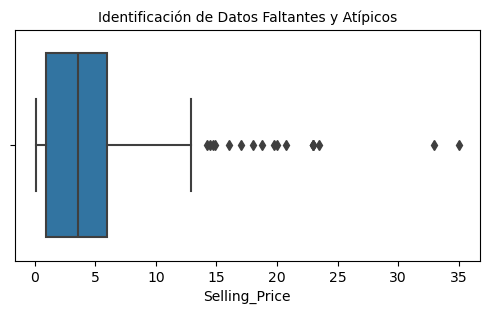

In [5]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Selling_Price'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

In [43]:
print("Cantidad de Registros con cero en  Year: ",Datos['Year'].isin([0]).sum())
print("Cantidad de Registros con cero en Selling_Price: ",Datos['Selling_Price'].isin([0]).sum())
print("Cantidad de Registros con cero en Present_Price: ",Datos['Present_Price'].isin([0]).sum())
print("Cantidad de Registros con cero en Kms_Driven: ",Datos['Kms_Driven'].isin([0]).sum())
print("Cantidad de Registros con cero en Owner: ",Datos['Owner'].isin([0]).sum())

Cantidad de Registros con cero en  Year:  0
Cantidad de Registros con cero en Selling_Price:  0
Cantidad de Registros con cero en Present_Price:  0
Cantidad de Registros con cero en Kms_Driven:  0
Cantidad de Registros con cero en Owner:  290


In [44]:
Datos['Owner']=Datos['Owner'].replace(0,Datos['Owner'].mean())

In [45]:
print("Cantidad de Registros con cero en  Year: ",Datos['Year'].isin([0]).sum())
print("Cantidad de Registros con cero en Selling_Price: ",Datos['Selling_Price'].isin([0]).sum())
print("Cantidad de Registros con cero en Present_Price: ",Datos['Present_Price'].isin([0]).sum())
print("Cantidad de Registros con cero en Kms_Driven: ",Datos['Kms_Driven'].isin([0]).sum())
print("Cantidad de Registros con cero en Owner: ",Datos['Owner'].isin([0]).sum())

Cantidad de Registros con cero en  Year:  0
Cantidad de Registros con cero en Selling_Price:  0
Cantidad de Registros con cero en Present_Price:  0
Cantidad de Registros con cero en Kms_Driven:  0
Cantidad de Registros con cero en Owner:  0


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

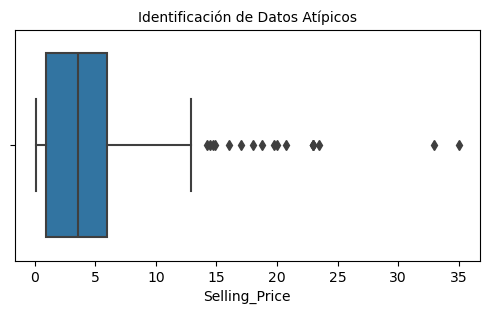

In [46]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Selling_Price'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [47]:
nivel_minimo=5
nivel_maximo=30
Total_Atipicos=((Datos['Selling_Price']<nivel_minimo)|(Datos['Selling_Price']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 195


In [49]:
Datos=Datos[(Datos['Selling_Price']<nivel_maximo)&(Datos['Selling_Price']>nivel_minimo)]

In [50]:
Total_Atipicos=((Datos['Selling_Price']<nivel_minimo)|(Datos['Selling_Price']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [51]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 2 to 300
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           105 non-null    int64  
 1   Selling_Price  105 non-null    float64
 2   Present_Price  105 non-null    float64
 3   Kms_Driven     105 non-null    int64  
 4   Owner          105 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 4.9 KB


In [67]:
Datos['Owner'].value_counts()

Owner
0.043189    104
1.000000      1
Name: count, dtype: int64

In [16]:
Datos[['Selling_Price']].head(40)

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60
5,9.25
6,6.75
7,6.50
8,8.75
9,7.45


In [3]:
#Datos = Datos[['selling_price', 'km_driven', 'year']] 
X = Datos.drop('Selling_Price',axis=1) 
Y = Datos['Selling_Price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state= 0)

In [4]:
print (X_train)

     Year  Present_Price  Kms_Driven  Owner
146  2014          0.787       15000      0
260  2016         13.600       29223      0
37   2003          2.280      127000      0
273  2010          7.500       61203      0
164  2016          0.540       14000      0
..    ...            ...         ...    ...
251  2013          9.900       56701      0
192  2007          0.750       49000      1
117  2015          1.900       14000      0
47   2006          4.150       65000      0
172  2014          0.640       13700      0

[225 rows x 4 columns]


In [13]:
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state= 0) 
modelo_regresion = LinearRegression()
modelo_regresion.fit (X_train , Y_train)
Prediccion = modelo_regresion.predict(X_test)

In [14]:
print (Y_test)

223     8.25
150     0.50
226     5.25
296     9.50
52     18.00
       ...  
46      2.65
158     0.48
230     6.15
179     0.31
27      6.00
Name: Selling_Price, Length: 76, dtype: float64


In [15]:
print (Prediccion)

[ 6.02286535  0.14865026  4.21472535  7.51656883 11.92473863  4.76688074
  3.48289163  2.12109479  3.90420603  4.75690371  1.99172131  2.31630631
  5.0574387   6.28370978  7.12173649 13.57428929  6.0023368   4.31152503
  0.25939831  3.16249945  3.65776874  3.24398775  5.17840052  8.49210733
 -1.14973914  2.68437104  0.13367695  1.59670407  0.65060225  6.24732426
  1.25028251  5.84463766  1.49429088  6.19300374  3.78726227  2.58524546
  5.61191039  5.2650477  -2.54272232  7.84674077  7.49373037 18.56417455
  4.21353681  3.52238928  4.94635257  8.49288825  0.87297225  2.42401268
  5.42351415  5.63561865  6.88723382  4.01560928  5.17981616 18.98601886
  2.58579303  2.15012996  0.97318514  1.91077423  3.45651416  1.30354108
  3.90759726  5.37323909  2.33030512 19.95837454  4.33063809  5.71027081
  7.82388644  7.98937886  2.52307939  2.53472102  3.78205612  2.9787269
  2.53815228  5.17891878 -0.1513178   5.44280916]


In [18]:
print(classification_report(Y_test,Prediccion))

ValueError: continuous is not supported